In [284]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

In [285]:
df1 = pd.read_csv('/Users/pradeep/exp/capstone/data/Fine_2014_2019_Finger_millet_Min_Blore_Mysore.csv')
df1.head()

,district,commodity,Arrival Date,variety,Min_price
0,Mysore,Ragi (Finger Millet),02-01-14,Fine,1600
1,Mysore,Ragi (Finger Millet),03-01-14,Fine,2000
2,Mysore,Ragi (Finger Millet),04-01-14,Fine,1800
3,Mysore,Ragi (Finger Millet),07-01-14,Fine,2000
4,Mysore,Ragi (Finger Millet),08-01-14,Fine,2100


In [286]:
gp = pd.pivot_table(df1,values='Min_price',columns=['district','commodity'],index=['Arrival Date'])
#gp = gp.sort_index(axis='columns', level='Arrival Date')
gp.head()

district,Bangalore,Mysore
commodity,Ragi (Finger Millet),Ragi (Finger Millet)
Arrival Date,,
01-01-15,1900,1900
01-01-16,1800,1800
01-01-18,2800,2800
01-01-19,2800,2800
01-02-15,1900,1900


In [287]:
flattened = pd.DataFrame(gp.to_records())
flattened['Arrival Date'] = pd.to_datetime(flattened['Arrival Date'])
flattened = flattened.sort_values(by=['Arrival Date'])
df = flattened.reset_index()
del df['index']
df.head()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
0,2014-01-03,1800,1800
1,2014-01-04,1800,1800
2,2014-01-06,1800,1800
3,2014-01-07,1700,1700
4,2014-01-08,1850,1850


In [288]:
ndf = df.fillna(method='ffill')

In [289]:
ndf.to_csv('/Users/pradeep/exp/capstone/data/Finger_millet_2006_2019_Complete_after_PreProcessing.csv', encoding='utf-8')

In [290]:
df = pd.read_csv('/Users/pradeep/exp/capstone/data/Finger_millet_2006_2019_Complete_after_PreProcessing.csv')
del df['Unnamed: 0']
df.head()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
0,2014-01-03,1800,1800
1,2014-01-04,1800,1800
2,2014-01-06,1800,1800
3,2014-01-07,1700,1700
4,2014-01-08,1850,1850


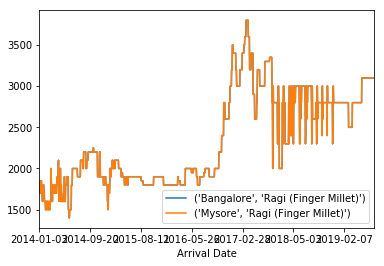

In [291]:
df.plot(x='Arrival Date')

In [292]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date']).astype('int')
df.describe()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
count,1.320000e+03,1320.000000,1320.000000
mean,1.474445e+18,2351.060606,2351.060606
std,5.209773e+16,560.399318,560.399318
min,1.388707e+18,1400.000000,1400.000000
25%,1.430482e+18,1900.000000,1900.000000
50%,1.470744e+18,2100.000000,2100.000000
75%,1.523362e+18,2800.000000,2800.000000
max,1.565222e+18,3800.000000,3800.000000


In [293]:
training_set = df.iloc[:,[1,2]].values
training_set

array([[1800, 1800],
       [1800, 1800],
       [1800, 1800],
       ...,
       [3100, 3100],
       [3100, 3100],
       [3100, 3100]])

In [294]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(training_set)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [295]:
train_size = int(len(scaled) * 0.80)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1056
test: 264


In [296]:
print(train.shape)
print(test.shape)

(1056, 2)
(264, 2)


In [297]:
train

array([[0.16666667, 0.16666667],
       [0.16666667, 0.16666667],
       [0.16666667, 0.16666667],
       ...,
       [0.5       , 0.5       ],
       [0.58333333, 0.58333333],
       [0.58333333, 0.58333333]])

In [298]:
def create_dataset(dataset, look_back=32):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print("a:")
        print(a)
        print('Y {}'.format(i + look_back))
        b = dataset[i + look_back]
        print(b)
        #dataset[i + look_back,1:2]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [299]:
look_back = 17
#32
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

1056 17
0
X 0 to 17
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.08333333 0.08333333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 17
[0.16666667 0.16666667]
1
X 1 to 18
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.08333333 0.08333333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 18
[0.125 0.125]
2
X 2 to 19
a:
[[0.16666667 0.16666667]
 [0.125      0.125    

Y 134
[0.25 0.25]
118
X 118 to 135
a:
[[0.         0.        ]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 135
[0.25 0.25]
119
X 119 to 136
a:
[[0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.04166667 0.04166667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 136
[0.25 0.25]
120
X 120 to 137
a:
[[0.04166667 0.04166667]
 [0.04166

 [0.29166667 0.29166667]]
Y 307
[0.29166667 0.29166667]
291
X 291 to 308
a:
[[0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]]
Y 308
[0.29166667 0.29166667]
292
X 292 to 309
a:
[[0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]
 [0.29166667 0.29166667]]
Y 309
[0.29166667 0.29

 [0.1875     0.1875    ]]
Y 340
[0.1875 0.1875]
324
X 324 to 341
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]]
Y 341
[0.20833333 0.20833333]
325
X 325 to 342
a:
[[0.20833333 0.20833333]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.20833333 0.20833333]]
Y 342
[0.20833333 0.20833333]


 [0.20833333 0.20833333]]
Y 482
[0.20833333 0.20833333]
466
X 466 to 483
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 483
[0.20833333 0.20833333]
467
X 467 to 484
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 484
[0.20833333 0.20

Y 503
[0.16666667 0.16666667]
487
X 487 to 504
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 504
[0.16666667 0.16666667]
488
X 488 to 505
a:
[[0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 505
[0.16666667 0.16666667]
489
X 489 to 506
a

 [0.20833333 0.20833333]]
Y 641
[0.20833333 0.20833333]
625
X 625 to 642
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 642
[0.20833333 0.20833333]
626
X 626 to 643
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 643
[0.20833333 0.20

 [0.20833333 0.20833333]]
Y 673
[0.20833333 0.20833333]
657
X 657 to 674
a:
[[0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 674
[0.20833333 0.20833333]
658
X 658 to 675
a:
[[0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 675
[0.20833333 0.20

X 816 to 833
a:
[[1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]]
Y 833
[0.75 0.75]
817
X 817 to 834
a:
[[1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.91666667 0.91666667]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]]
Y 834
[0.83333333 0.83333333]
818
X 818 to 835
a:
[[1.         1.        ]
 [1.         1.    

861
X 861 to 878
a:
[[0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 878
[0.66666667 0.66666667]
862
X 862 to 879
a:
[[0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.75       0.75      ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 879
[0.66666667 0.66666667]
863
X 863 to 880
a:
[[0.75       0.75      ]
 [0

[0.66666667 0.66666667]
994
X 994 to 1011
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.375      0.375     ]
 [0.375      0.375     ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1011
[0.66666667 0.66666667]
995
X 995 to 1012
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.375      0.375     ]
 [0.375      0.375     ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1012
[0.66666667 0.66666667]
996
X 996 to 1013
a:

 [0.58333333 0.58333333]]
Y 1033
[0.66666667 0.66666667]
1017
X 1017 to 1034
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.375      0.375     ]
 [0.375      0.375     ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.5        0.5       ]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.66666667 0.66666667]]
Y 1034
[0.66666667 0.66666667]
1018
X 1018 to 1035
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.375      0.375     ]
 [0.375      0.375     ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.5        0.5       ]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1035
[0.6666

264 17
0
X 0 to 17
a:
[[0.58333333 0.58333333]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]]
Y 17
[0.375 0.375]
1
X 1 to 18
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.375      0.375     ]]
Y 18
[0.66666667 0.66666667]
2
X 2 to 19
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667

[0.58333333 0.58333333]
125
X 125 to 142
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 142
[0.58333333 0.58333333]
126
X 126 to 143
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 143
[0.58333333 0.58333333]
127
X 127 to 144
a:
[[0.

[0.45833333 0.45833333]
158
X 158 to 175
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]]
Y 175
[0.45833333 0.45833333]
159
X 159 to 176
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]
 [0.45833333 0.45833333]]
Y 176
[0.45833333 0.45833333]
160
X 160 to 177
a:
[[0.

 [0.70833333 0.70833333]]
Y 215
[0.70833333 0.70833333]
199
X 199 to 216
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]]
Y 216
[0.70833333 0.70833333]
200
X 200 to 217
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]]
Y 217
[0.70833333 0.70

In [300]:
y_train[0]

array([0.16666667, 0.16666667])

In [301]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1038, 17, 2)
(246, 17, 2)
(1038, 2)
(246, 2)


In [302]:
#X_test

In [303]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2] ))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
print(X_train.shape)
print(X_test.shape)

(1038, 17, 2)
(246, 17, 2)


In [304]:
batch_size = 1
model = Sequential()
model.add(LSTM(units=200, batch_input_shape=(batch_size, look_back, 2), stateful=True))
#model.add(LSTM(50, return_sequences=True))  
#model.add(LSTM(units=100, batch_input_shape=(batch_size, look_back, 1), stateful=True))

model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (1, 200)                  162400    
_________________________________________________________________
dense_13 (Dense)             (1, 2)                    402       
Total params: 162,802
Trainable params: 162,802
Non-trainable params: 0
_________________________________________________________________


In [305]:
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/10
 - 12s - loss: 0.0050
Epoch 2/10
 - 10s - loss: 0.0032
Epoch 3/10
 - 10s - loss: 0.0027
Epoch 4/10
 - 10s - loss: 0.0029
Epoch 5/10
 - 10s - loss: 0.0025
Epoch 6/10
 - 10s - loss: 0.0025
Epoch 7/10
 - 11s - loss: 0.0026
Epoch 8/10
 - 10s - loss: 0.0026
Epoch 9/10
 - 10s - loss: 0.0025
Epoch 10/10
 - 10s - loss: 0.0026


In [306]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

In [307]:
#X_test

In [308]:
#testPredict = model.predict(X_test, batch_size=batch_size)
#print(testPredict.shape)
#testPredict
#testPredict = scaler.inverse_transform(testPredict)


In [309]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[0]))
print('Train Score column 0: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[0]))
print('Test Score column 0: %.2f RMSE' % (testScore))
trainScore = math.sqrt(mean_squared_error(y_train[1], trainPredict[1]))
print('Train Score column 1: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[1], testPredict[1]))
print('Test Score column 1: %.2f RMSE' % (testScore))

Train Score column 0: 25.56 RMSE
Test Score column 0: 461.06 RMSE
Train Score column 1: 83.75 RMSE
Test Score column 1: 653.63 RMSE


In [310]:
y_test

array([[2300., 2300.],
       [3000., 3000.],
       [3000., 3000.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2300., 2300.],
       [2400., 2400.],
       [3000., 3000.],
       [3000., 3000.],
       [2600., 2600.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2800., 2800.],
       [2400., 2400.],
       [3000., 3000.],
       [3000., 3000.],
       [260

In [311]:
testPredict

array([[2760.6357, 2761.4849],
       [2345.663 , 2347.0715],
       [3000.245 , 3002.3452],
       [2862.7634, 2862.517 ],
       [2561.152 , 2562.3486],
       [2598.1084, 2600.372 ],
       [2574.7207, 2576.2087],
       [2567.6477, 2568.6987],
       [2560.6519, 2561.536 ],
       [2557.0374, 2557.9631],
       [2555.1582, 2556.168 ],
       [2554.4275, 2555.4822],
       [2554.241 , 2555.2817],
       [2554.2673, 2555.2498],
       [2554.3335, 2555.2383],
       [2554.3757, 2555.2024],
       [2554.3826, 2555.1436],
       [2733.7495, 2734.2925],
       [2713.3984, 2713.6416],
       [2732.1248, 2732.7144],
       [2302.6177, 2303.449 ],
       [2432.8325, 2435.8838],
       [2925.076 , 2924.9282],
       [2849.8896, 2849.1458],
       [2545.9768, 2546.9287],
       [2772.2485, 2774.0842],
       [2729.9692, 2730.6768],
       [2744.2068, 2744.7776],
       [2743.8547, 2744.3252],
       [2745.7693, 2746.2078],
       [2746.3542, 2746.778 ],
       [2746.7417, 2747.1694],
       [

In [312]:
trainPredict

array([[1773.5173, 1775.397 ],
       [1782.7803, 1784.7118],
       [1702.1729, 1702.9722],
       ...,
       [2854.0166, 2853.5288],
       [2902.119 , 2902.9893],
       [2560.155 , 2562.2761]], dtype=float32)

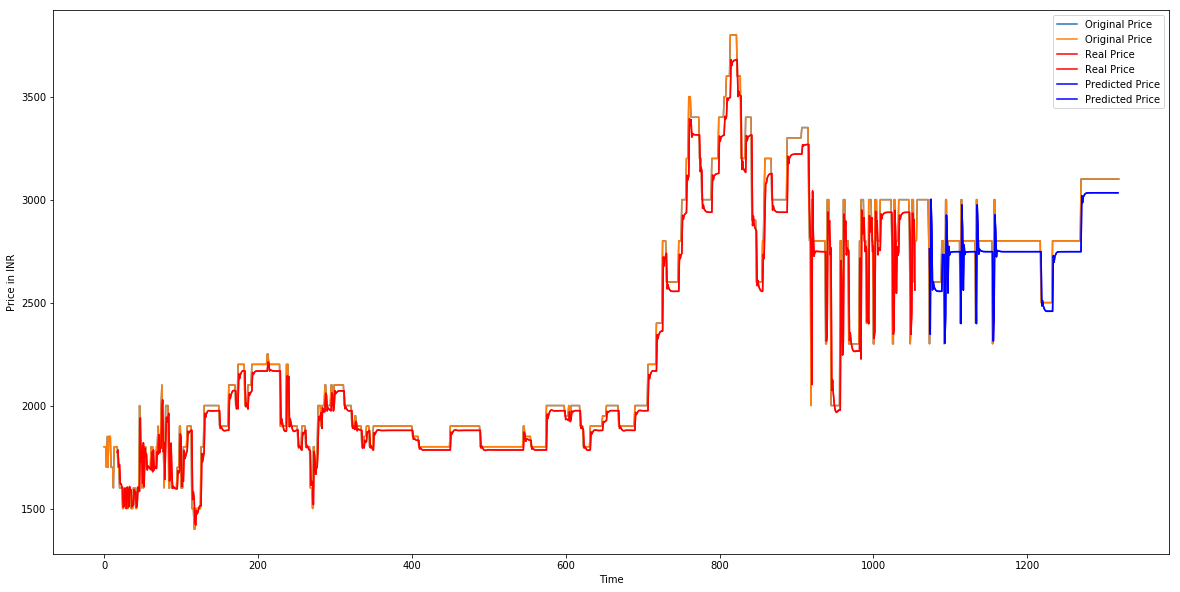

In [313]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled),label = 'Original Price')
plt.plot(trainPredictPlot, color = 'red', label = 'Real Price')
plt.plot(testPredictPlot, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price in INR')
plt.legend()
#plt.plot(x='Arrival Date')
plt.show()